## Breast Cancer

1. Which of the following models gives good performance on Breast Cancer dataset?
    - Logistic Regression
    - KNN
    - Naive Bayes
    - SVC (norma, polynomial kernel, RBF Kernel)
    - Decision Tree
    - Random Forest
    - Ada Boost
    - xgBoost
    - Gradient Boosting

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [4]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [5]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    if hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test)
    elif hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        raise AttributeError("Model does not have decision_function or predict_proba method.")
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_scores)
    roc_auc = metrics.roc_auc_score(y_test, y_scores)
    
    return accuracy, recall, precision, f1, fpr, tpr, roc_auc

In [6]:
# Evaluate each model and store the results
results = {}
for model in models:
    model_name = model.__class__.__name__
    accuracy, recall, precision, f1, fpr, tpr, roc_auc = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

In [7]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
# Display the DataFrame
results_df[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']]

,accuracy,recall,precision,f1,roc_auc
LogisticRegression,0.964912,0.985915,0.958904,0.972222,0.998035
KNeighborsClassifier,0.956140,1.000000,0.934211,0.965986,0.995906
GaussianNB,0.973684,1.000000,0.959459,0.979310,0.998362
SVC,0.947368,1.000000,0.922078,0.959459,0.993449
DecisionTreeClassifier,0.929825,0.943662,0.943662,0.943662,0.925319
RandomForestClassifier,0.956140,0.971831,0.958333,0.965035,0.994923
AdaBoostClassifier,0.973684,0.985915,0.972222,0.979021,0.997052
GradientBoostingClassifier,0.956140,0.971831,0.958333,0.965035,0.994432
XGBClassifier,0.956140,0.971831,0.958333,0.965035,0.991156


LogisticRegression:
  Accuracy: 0.9649
  Recall: 0.9859
  Precision: 0.9589
  F1: 0.9722


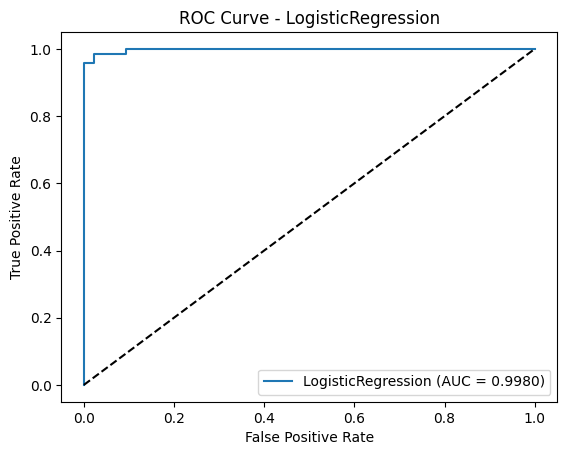

KNeighborsClassifier:
  Accuracy: 0.9561
  Recall: 1.0000
  Precision: 0.9342
  F1: 0.9660


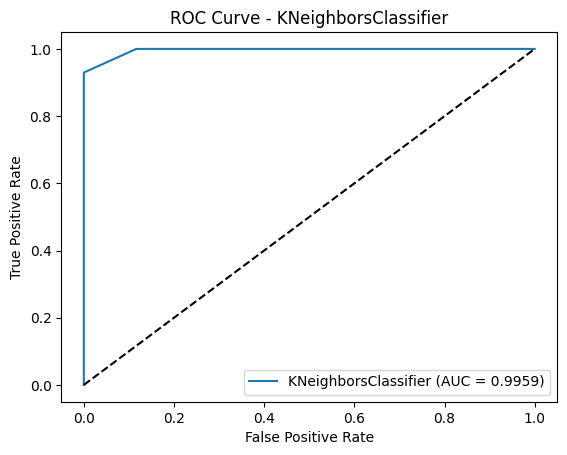

GaussianNB:
  Accuracy: 0.9737
  Recall: 1.0000
  Precision: 0.9595
  F1: 0.9793


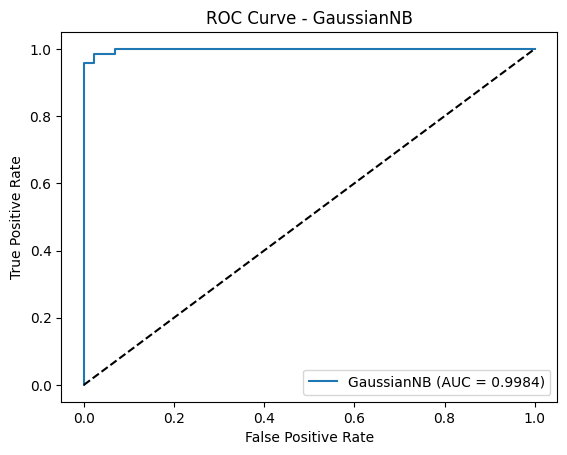

SVC:
  Accuracy: 0.9474
  Recall: 1.0000
  Precision: 0.9221
  F1: 0.9595


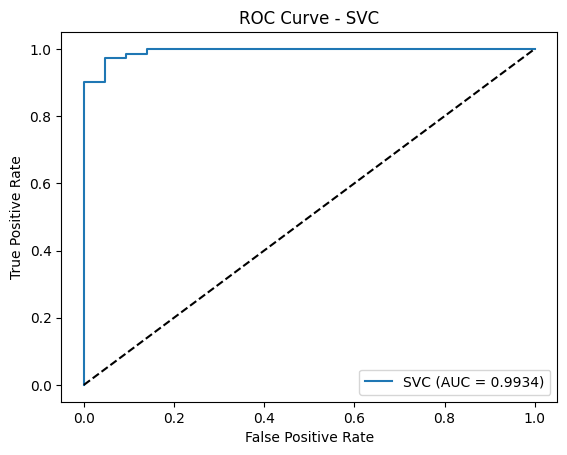

DecisionTreeClassifier:
  Accuracy: 0.9298
  Recall: 0.9437
  Precision: 0.9437
  F1: 0.9437


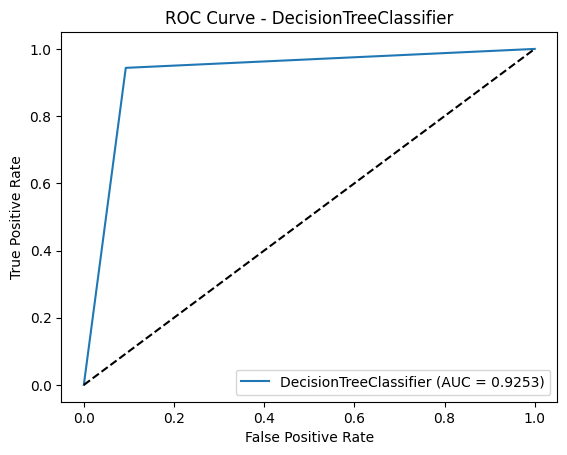

RandomForestClassifier:
  Accuracy: 0.9561
  Recall: 0.9718
  Precision: 0.9583
  F1: 0.9650


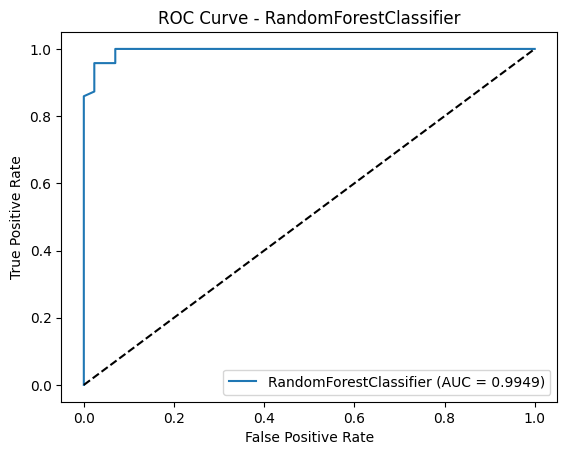

AdaBoostClassifier:
  Accuracy: 0.9737
  Recall: 0.9859
  Precision: 0.9722
  F1: 0.9790


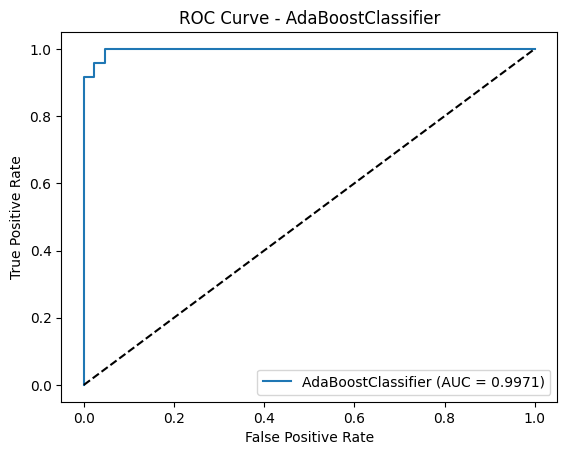

GradientBoostingClassifier:
  Accuracy: 0.9561
  Recall: 0.9718
  Precision: 0.9583
  F1: 0.9650


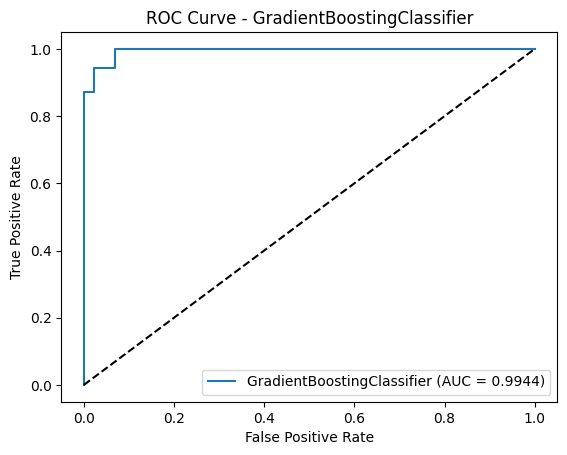

XGBClassifier:
  Accuracy: 0.9561
  Recall: 0.9718
  Precision: 0.9583
  F1: 0.9650


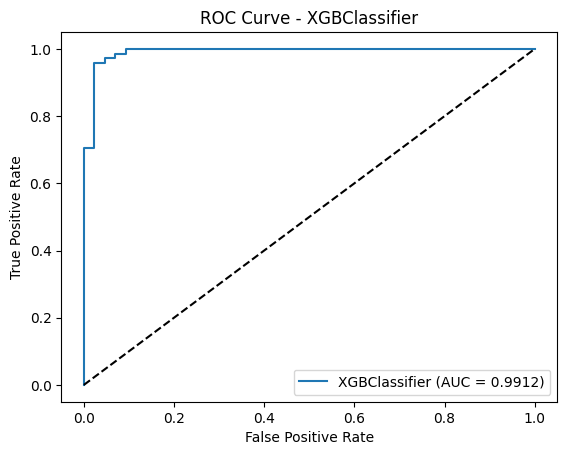

In [8]:
# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1: {metrics['f1']:.4f}")

    # Plot ROC curve
    plt.figure()
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'{model_name} (AUC = {metrics["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()